# Evaluating the Results



## Quick look at the data

Just as a quick reference to remember which columns are available.
Double check for stupid mistakes.

In [127]:
import pandas as pd
from _conf import SIMPLIFIED_RESULTS, PUBLIC_DATA

results = pd.read_json(SIMPLIFIED_RESULTS)
results["opt_gap"] = (results["objective"] - results["lower_bound"]) / results["objective"]
results["strategy"].replace({"GurobiTspSolver": "Dantzig (Gurobi)", "CpSatTspSolverV1": "AddCircuit","CpSatTspSolverDantzig": "Iterative Dantzig", "CpSatTspSolverMtz": "Miller-Tucker-Zemlin"}, inplace=True)
results["opt"] = results["opt_gap"] <= 0.001
results.sort_values(["num_nodes", "instance_name"])

,instance_name,num_nodes,time_limit,strategy,opt_tol,runtime,objective,lower_bound,opt_gap,opt
79,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.001,0.022691,1.184627e+08,118462718.0,0.000000,True
80,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.010,0.014245,1.184627e+08,117918883.0,0.004591,False
81,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.050,0.010104,1.184627e+08,113064807.0,0.045566,False
82,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.100,0.010147,1.184627e+08,113064807.0,0.045566,False
83,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.250,0.010457,1.184627e+08,113064807.0,0.045566,False
...,...,...,...,...,...,...,...,...,...,...
750,random_euclidean_100_7,100,90,Iterative Dantzig,0.001,90.277635,7.636529e+07,0.0,1.000000,False
751,random_euclidean_100_7,100,90,Iterative Dantzig,0.010,90.955522,7.636529e+07,76340364.0,0.000326,True
752,random_euclidean_100_7,100,90,Iterative Dantzig,0.050,90.192406,7.732743e+07,0.0,1.000000,False
753,random_euclidean_100_7,100,90,Iterative Dantzig,0.100,90.316614,1.382235e+09,0.0,1.000000,False


In [128]:
t = results.sort_values(["num_nodes", "instance_name"])
t[t["opt_tol"] == 0.001]

,instance_name,num_nodes,time_limit,strategy,opt_tol,runtime,objective,lower_bound,opt_gap,opt
79,random_euclidean_25_0,25,90,Dantzig (Gurobi),0.001,0.022691,118462718.0,118462718.0,0.000000,True
84,random_euclidean_25_0,25,90,AddCircuit,0.001,0.062708,118462718.0,118462718.0,0.000000,True
89,random_euclidean_25_0,25,90,Iterative Dantzig,0.001,0.128039,118462718.0,118462718.0,0.000000,True
94,random_euclidean_25_0,25,90,Miller-Tucker-Zemlin,0.001,0.139193,118462718.0,118462718.0,0.000000,True
99,random_euclidean_25_1,25,90,Dantzig (Gurobi),0.001,0.014724,80173028.0,80173028.0,0.000000,True
...,...,...,...,...,...,...,...,...,...,...
668,random_euclidean_100_6,100,90,Iterative Dantzig,0.001,90.403300,80271170.0,80271170.0,0.000000,True
735,random_euclidean_100_6,100,90,Miller-Tucker-Zemlin,0.001,90.683313,86251906.0,72571084.0,0.158615,False
740,random_euclidean_100_7,100,90,Dantzig (Gurobi),0.001,0.581772,76365290.0,76354638.0,0.000139,True
745,random_euclidean_100_7,100,90,AddCircuit,0.001,11.297903,76365290.0,76360903.0,0.000057,True


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

## Looking at the runtime

We can take a quick look at the runtime of the different models.
This is a good sanity check to see if the models are actually running.
However, you will notice the sigmoidal shape of the runtime.
The instances do not suddenly get easier, but the runtime is limited by the timeout.
The true runtime can be expected to be an exponential curve.
For this reason, this is not a good metric to compare the models and may be misleading.

runtime
num_nodes strategy                       
25        AddCircuit             0.069116
          Dantzig (Gurobi)       0.016979
          Iterative Dantzig      0.478207
          Miller-Tucker-Zemlin   0.470061
50        AddCircuit             0.727073
          Dantzig (Gurobi)       0.100930
          Iterative Dantzig     24.104337
          Miller-Tucker-Zemlin  42.160611
75        AddCircuit             4.527447
          Dantzig (Gurobi)       0.279518
          Iterative Dantzig     74.733527
          Miller-Tucker-Zemlin  74.354521
100       AddCircuit            12.127267
          Dantzig (Gurobi)       0.584525
          Iterative Dantzig     90.430456
          Miller-Tucker-Zemlin  90.647667

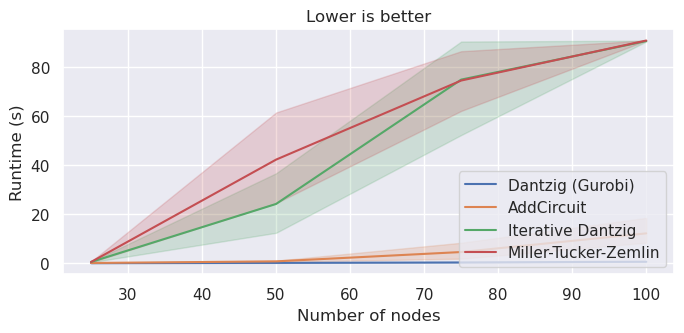

In [130]:
from IPython.display import display
t = results.sort_values(["num_nodes", "instance_name"])
t = t[t["opt_tol"] == 0.001]
display(t.groupby(["num_nodes", "strategy"])[["runtime"]].mean())
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=t, x="num_nodes", y="runtime", hue="strategy")
plt.ylabel("Runtime (s)")
plt.title("Lower is better")
plt.legend(loc="lower right")
plt.xlabel("Number of nodes")
plt.tight_layout()
plt.savefig(PUBLIC_DATA/"runtime.png")
plt.show()

## Plotting how many instances could still be solved to optimality

This is a more interesting metric.
Suddenly, we also see some differences between the `CpSatTspSolverMtz` and `CpSatTspSolverDantzig` models.


opt_perc
num_nodes strategy                      
25        AddCircuit               100.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig        100.0
          Miller-Tucker-Zemlin     100.0
50        AddCircuit               100.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig        100.0
          Miller-Tucker-Zemlin      80.0
75        AddCircuit               100.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig         60.0
          Miller-Tucker-Zemlin      50.0
100       AddCircuit               100.0
          Dantzig (Gurobi)         100.0
          Iterative Dantzig         75.0
          Miller-Tucker-Zemlin       0.0

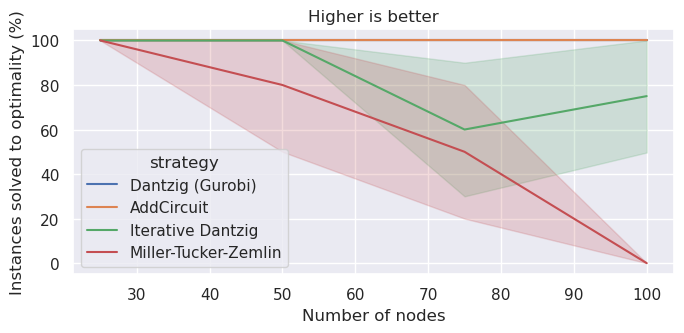

In [131]:
t = results.sort_values(["num_nodes", "instance_name"])
t = t[t["opt_tol"] == 0.001]
t["opt_perc"] = t["opt"] * 100
display(t.groupby(["num_nodes", "strategy"])[["opt_perc"]].mean())
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=t, x="num_nodes", y="opt_perc", hue="strategy")
plt.ylabel("Instances solved to optimality (%)")
plt.xlabel("Number of nodes")
plt.title("Higher is better")
plt.tight_layout()
plt.savefig(PUBLIC_DATA/"solved_over_size.png")
plt.show()

However, getting nearly optimal solutions is often signficantly easier than getting optimal solutions.
For this reason, we may also want to check if the performance changes when we relax the optimality tolerance.
Often, the data is inaccurate anyway, such that a 5% or even 20% optimality gap can be acceptable.
We actually see that the `CpSatTspSolvingMtz` is better than `CpSatTspSolvingDantzig` for a 20% optimality gap.
Also the `CpSatTspSolvingV1` model can solve significantly larger models if we relax the optimality tolerance.

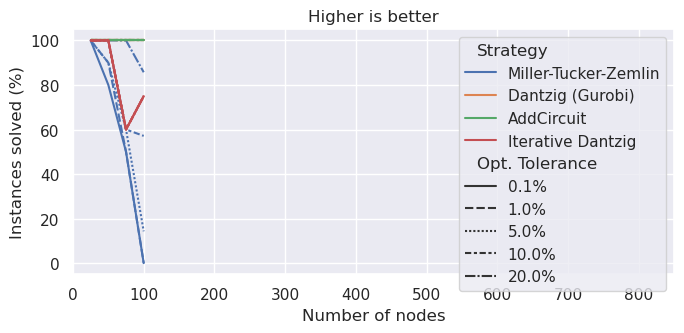

In [132]:
# Same plot but this time use the best lower bound available for each instance.
opt_gaps = [0.001, 0.01, 0.05, 0.1, 0.2]
data = []
for opt_gap in opt_gaps:
    t = results[results["opt_tol"]==0.001].copy()
    t["opt_gap"] = (t["objective"] - t["lower_bound"]) / t["lower_bound"]
    t["succ"] = t["opt_gap"] <= opt_gap
    t["Opt. Tolerance"] = f"{100*opt_gap}%"
    data.append(t)
t = pd.concat(data)
t["succ_perc"] = t["succ"] * 100
plt.figure(figsize=(7, 3.5))
t.rename(columns={"strategy": "Strategy"}, inplace=True)
sns.lineplot(data=t, x="num_nodes", y="succ_perc", hue="Strategy", style="Opt. Tolerance", errorbar=None)
plt.ylabel("Instances solved (%)")
plt.xlabel("Number of nodes")
plt.xlim(0, 850)
plt.title("Higher is better")
plt.tight_layout()
plt.savefig(PUBLIC_DATA/"solved_over_size_opt_tol.png")
plt.show()

A further point to consider is that the optimality gap is always calculated based on the own lower bound.
If we need solutions with a quality estimate, this is the way to go.
If we do not need the quality estimate, we can also use the best lower bound of all solvers to get a better estimate on the real optimality gap.
This is what we do in the next section.
The decision on which bound to use depends on the use case.

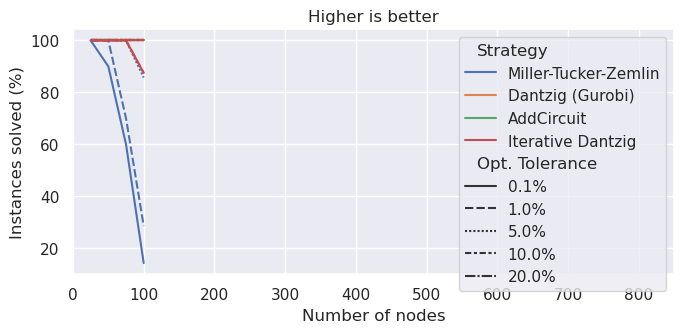

In [133]:
# Same plot but this time use the best lower bound available for each instance.
opt_gaps = [0.001, 0.01, 0.05, 0.1, 0.2]
data = []
best_lb = results.groupby(["instance_name"])[["lower_bound"]].max().reset_index()
for opt_gap in opt_gaps:
    t = results[results["opt_tol"]==0.001].merge(best_lb, on="instance_name", suffixes=("", "_best_lb")).copy()
    t["opt_gap"] = (t["objective"] - t["lower_bound_best_lb"]) / t["lower_bound_best_lb"]
    t["succ"] = t["opt_gap"] <= opt_gap
    t["Opt. Tolerance"] = f"{100*opt_gap}%"
    data.append(t)
t = pd.concat(data)
t["succ_perc"] = t["succ"] * 100
plt.figure(figsize=(7, 3.5))
t.rename(columns={"strategy": "Strategy"}, inplace=True)
sns.lineplot(data=t, x="num_nodes", y="succ_perc", hue="Strategy", style="Opt. Tolerance", errorbar=None)
plt.ylabel("Instances solved (%)")
plt.xlabel("Number of nodes")
plt.xlim(0, 850)
plt.title("Higher is better")
plt.tight_layout()
plt.savefig(PUBLIC_DATA/"solved_over_size_opt_tol_best_lb.png")
plt.show()

## Comparing on unstructured benchmarks

The line plots above need a well structured benchmark to compute reliable data points.
If you do not have such a benchmark, you may want to go for the following plot which shows how many instances of the benchmark could be solved within a given time limit.
This also gives an insight into how fast the model can deal with simple instances.
In this specific case, we see that the `CpSatTspSolvingMtz` can solve more instances than `CpSatTspSolvingDantzig`, but `CpSatTspSolvingDantzig` is usually faster for the instances it can solve.


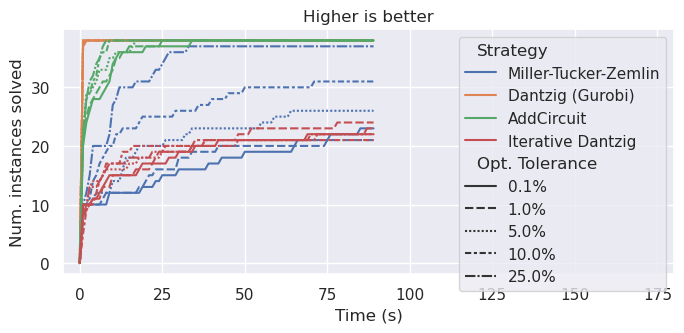

In [134]:
from _conf import TIME_LIMIT, OPTIMALITY_TOLERANCES
time_steps = [t_ for t_ in range(0, TIME_LIMIT)]
filtered_results = results[results["opt_gap"]<=1.001*results["opt_tol"]].copy()
def f(strategy, at_time, tol):
    t = filtered_results[filtered_results["strategy"] == strategy]
    t = t[t["runtime"] <= at_time]
    t = t[t["opt_tol"] == tol]
    t.drop_duplicates(subset=["instance_name"], inplace=True)
    return len(t)
data = {
    "Strategy": [],
    "x": [],
    "time": [],
    "Opt. Tolerance": [],
}

for strateg in results["strategy"].unique().tolist():
    for time in time_steps:
        for tol in OPTIMALITY_TOLERANCES:
            data["Strategy"].append(strateg)
            data["x"].append(time)
            data["time"].append(f(strateg, time, tol))
            data["Opt. Tolerance"].append(f"{tol*100}%")
t = pd.DataFrame(data)
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=t, x="x", y="time", hue="Strategy", style="Opt. Tolerance", errorbar=None)
plt.ylabel("Num. instances solved")
plt.xlim(-5, 180)
plt.xlabel("Time (s)")
plt.title("Higher is better")
plt.tight_layout()
plt.savefig(PUBLIC_DATA/"cactus_plot_opt_tol.png")
plt.show()

In [135]:
from _conf import TIME_LIMIT, OPTIMALITY_TOLERANCES
time_steps = [t_ for t_ in range(0, TIME_LIMIT)]
filtered_results = results[results["opt_gap"]<=1.001*results["opt_tol"]].copy()
def f(strategy, at_time, tol):
    t = filtered_results[filtered_results["strategy"] == strategy]
    t = t[t["runtime"] <= at_time]
    t = t[t["opt_tol"] == tol]
    t.drop_duplicates(subset=["instance_name"], inplace=True)
    return len(t)
data = {
    "Strategy": [],
    "x": [],
    "time": [],
    "Opt. Tolerance": [],
}

for strateg in results["strategy"].unique().tolist():
    for time in time_steps:
        for tol in OPTIMALITY_TOLERANCES[:1]:
            data["Strategy"].append(strateg)
            data["x"].append(time)
            data["time"].append(f(strateg, time, tol))
            data["Opt. Tolerance"].append(tol*100)
t = pd.DataFrame(data)
plt.figure(figsize=(7, 3.5))
sns.lineplot(data=t, x="x", y="time", hue="Strategy", errorbar=None)
plt.ylabel("Num. instances solved to optimality")
plt.xlim(-5, 180)
plt.xlabel("Time (s)")
plt.title("Higher is better")
plt.tight_layout()
plt.savefig(PUBLIC_DATA/"cactus_plot.png")
plt.show()

In [ ]:
results[results["opt_gap"]>=results["opt_tol"]]

,instance_name,num_nodes,time_limit,strategy,opt_tol,runtime,objective,lower_bound,opt_gap,opt
0,random_euclidean_75_7,75,90,Miller-Tucker-Zemlin,0.001,90.408363,87465848.0,78150952.0,0.106498,False
1,random_euclidean_75_7,75,90,Miller-Tucker-Zemlin,0.010,90.403435,88102674.0,78805636.0,0.105525,False
2,random_euclidean_75_7,75,90,Miller-Tucker-Zemlin,0.050,90.379215,86108160.0,78618919.0,0.086975,False
3,random_euclidean_75_7,75,90,Miller-Tucker-Zemlin,0.100,90.385955,88415140.0,78879835.0,0.107847,False
15,random_euclidean_75_8,75,90,Iterative Dantzig,0.001,90.387573,76736360.0,0.0,1.000000,False
...,...,...,...,...,...,...,...,...,...,...
654,random_euclidean_100_5,100,90,Miller-Tucker-Zemlin,0.010,90.645246,81466560.0,69820695.0,0.142953,False
655,random_euclidean_100_5,100,90,Miller-Tucker-Zemlin,0.050,90.729640,81037998.0,69794069.0,0.138749,False
656,random_euclidean_100_5,100,90,Miller-Tucker-Zemlin,0.100,90.702368,81625294.0,70541082.0,0.135794,False
712,random_euclidean_50_2,50,90,Miller-Tucker-Zemlin,0.010,90.184779,85952208.0,84332473.0,0.018845,False
